In [4]:
import pandas as pd
data = pd.read_csv('../Dataset/Diabetes_Dataset.csv')
data

# Assume that you are trying to predict a multi-class outcome variable 'y' based on some features 'X1', 'X2', 'X3'
# X = df[['AGE','Urea', 'Cr', 'HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']]
# y = df['CLASS']

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,177,45364,F,20,4.6,70,9.6,4.1,1.8,1.0,2.3,0.8,30.0,Y
1,147,45365,F,25,10.0,35,4.0,4.3,3.5,0.8,1.3,0.8,22.0,N
2,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
3,129,45416,M,26,7.5,79,8.8,3.5,2.0,2.0,0.9,0.5,28.0,Y
4,67,34222,F,28,4.1,73,4.9,5.3,3.2,0.8,0.8,0.9,24.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,165,45412,F,77,5.0,106,5.4,3.9,2.1,1.2,4.2,1.1,24.0,N
996,186,454316,M,77,5.0,106,5.4,0.0,2.8,0.8,1.8,0.7,19.0,N
997,339,5980,M,77,6.2,99,7.2,3.2,1.1,0.8,2.0,0.5,29.0,Y
998,389,24101,M,77,6.2,99,7.2,3.2,1.1,0.8,2.0,0.5,29.0,Y


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, precision_score, recall_score
import pandas as pd

# Features and target
X = data[['AGE','Urea', 'Cr', 'HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']]
y = data['CLASS']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# ===============================
# Reusable Evaluation Function
# ===============================
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Kappa Score:", cohen_kappa_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))

# ===============================
# Model Calls
# ===============================
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

evaluate_model(GaussianNB(), "Gaussian Naive Bayes")
evaluate_model(DecisionTreeClassifier(), "Decision Tree")
evaluate_model(SVC(), "SVM")
evaluate_model(AdaBoostClassifier(), "AdaBoost")
evaluate_model(LinearDiscriminantAnalysis(), "LDA")
evaluate_model(Perceptron(), "Perceptron")
evaluate_model(KNeighborsClassifier(), "KNN")
evaluate_model(RandomForestClassifier(), "Random Forest")
evaluate_model(GradientBoostingClassifier(), "Gradient Boosting")
evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")
evaluate_model(ExtraTreesClassifier(), "Extra Trees")
evaluate_model(BaggingClassifier(), "Bagging")



=== Gaussian Naive Bayes ===
Accuracy: 0.9333333333333333
F1 Score: 0.9327318776235067
Kappa Score: 0.7896434456403605
Precision: 0.9326480829748804
Recall: 0.9333333333333333

=== Decision Tree ===
Accuracy: 0.9833333333333333
F1 Score: 0.9833385833899071
Kappa Score: 0.9466135174573798
Precision: 0.9833938417472253
Recall: 0.9833333333333333

=== SVM ===
Accuracy: 0.82
F1 Score: 0.7389010989010989
Kappa Score: 0.0
Precision: 0.6724
Recall: 0.82

=== AdaBoost ===
Accuracy: 0.9066666666666666
F1 Score: 0.8870683760683761
Kappa Score: 0.6129032258064517
Precision: 0.9095377128953771
Recall: 0.9066666666666666

=== LDA ===
Accuracy: 0.89
F1 Score: 0.8799492666631871
Kappa Score: 0.6474358974358974
Precision: 0.8740744535519127
Recall: 0.89

=== Perceptron ===
Accuracy: 0.84
F1 Score: 0.7992727272727272
Kappa Score: 0.278629395852119
Precision: 0.7800945626477541
Recall: 0.84

=== KNN ===
Accuracy: 0.8733333333333333
F1 Score: 0.8668726418353949
Kappa Score: 0.567050244958414
Precision: 

C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


=== Random Forest ===
Accuracy: 0.9733333333333334
F1 Score: 0.9712528115159693
Kappa Score: 0.9123063431745104
Precision: 0.9704762889440309
Recall: 0.9733333333333334


C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Gradient Boosting ===
Accuracy: 0.9833333333333333
F1 Score: 0.9817374137992639
Kappa Score: 0.9465450269056698
Precision: 0.9803146694575265
Recall: 0.9833333333333333

=== Logistic Regression ===
Accuracy: 0.9166666666666666
F1 Score: 0.9033115592161317
Kappa Score: 0.7037797701331017
Precision: 0.8971400778210117
Recall: 0.9166666666666666


C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: P


=== Extra Trees ===
Accuracy: 0.9533333333333334
F1 Score: 0.9504352437067868
Kappa Score: 0.8403102543629519
Precision: 0.950068134763787
Recall: 0.9533333333333334

=== Bagging ===
Accuracy: 0.9833333333333333
F1 Score: 0.9817374137992639
Kappa Score: 0.9465450269056698
Precision: 0.9803146694575265
Recall: 0.9833333333333333


C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revna\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
# XGBoost BEFORE FEATURE SELECTION

import xgboost as xgb
from sklearn.metrics import accuracy_score

import pandas as pd

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

data = pd.get_dummies(data, columns=['Gender'])

X = data.drop('CLASS', axis=1)
y = data['CLASS']
# Remove leading/trailing spaces
y = y.str.strip()

# Convert categorical variable to numerical
y = y.map({'N': 0, 'P': 1, 'Y': 2})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn import metrics
from sklearn.metrics import cohen_kappa_score

# Assuming y_test are your true classes and y_pred are your predicted classes

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for XGBoost: ", accuracy)

# F1 Score
f1_score = metrics.f1_score(y_test, y_pred, average='weighted') # you can change the average parameter to 'micro', 'macro', 'weighted', depending on your problem
print("F1 Score for XGBoost: ", f1_score)

# Kappa Score
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Kappa Score for XGBoost:", kappa_score)

# Precision
precision = metrics.precision_score(y_test, y_pred, average='weighted') # you can change the average parameter to 'micro', 'macro', 'weighted', depending on your problem
print("Precision for XGBoost: ", precision)

# Recall
recall = metrics.recall_score(y_test, y_pred, average='weighted') # you can change the average parameter to 'micro', 'macro', 'weighted', depending on your problem
print("Recall for XGBoost: ", recall)

Accuracy for XGBoost:  0.995
F1 Score for XGBoost:  0.995056727932834
Kappa Score for XGBoost: 0.9814281734608599
Precision for XGBoost:  0.9952500000000001
Recall for XGBoost:  0.995


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier #inbuilt library in sklearn for stacking classifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score #Evaluation metrics
from sklearn.tree import DecisionTreeClassifier #Decision Trees
from sklearn.svm import SVC #Support Vector
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA
from sklearn.linear_model import Perceptron, LogisticRegression # Perceptron and Logistic Regression. Logistic Regression is also used as meta classifier 
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from xgboost import XGBClassifier # Only algorithm which was not inbuilt in sklearn library 
from sklearn.preprocessing import LabelEncoder # Used for sorting error which was constantly appearing of the target variable

# Load your dataset
df = pd.read_csv('C:\DiabetesData\Diabetes_Dataset.csv')

X = df[['AGE','Urea', 'Cr', 'HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']] #The attributes which are used for analysis
y = df['CLASS'] # Target 

# The next 3 lines of code is due to inferring invalid classes from unique values (the error mentioned above)
# Remove leading and trailing spaces
y = y.str.strip()

# Create a label encoder
label_encoder = LabelEncoder()

# Fit the encoder and transform 'y'
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base classifiers
base_classifiers = [
    ('dt', DecisionTreeClassifier()), #Decision Trees
    ('svm', SVC()), #Support Vector Machine/Classifier
    ('ada', AdaBoostClassifier()), #AdaBoost
    ('xgb', XGBClassifier()), #XGBoost
    ('lda', LinearDiscriminantAnalysis()), #LDA
    ('per', Perceptron()), #Perceptron
    ('knn', KNeighborsClassifier()), #KNN
    ('gnb', GaussianNB()), #K Nearest Neighbor
    ('rf', RandomForestClassifier()), #Random Forests
    ('gb', GradientBoostingClassifier()), # Gradient Boosting
    ('lr', LogisticRegression(max_iter=10000)), #Logistic Regression. Maximum Iterations increased and specified
    ('et', ExtraTreesClassifier()), # ExtraTrees
    ('bag', BaggingClassifier()) # Bagging 
]

# Initialize the stacking classifier - Basically here we create a class called stacking_clf 
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(max_iter=10000))

# Train the classifiers
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluation Metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))
print('Kappa Index:', cohen_kappa_score(y_test, y_pred))

Accuracy: 0.995
Precision: 0.9952500000000001
Recall: 0.995
F1-Score: 0.995056727932834
Kappa Index: 0.9814281734608599


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming y_test are your true labels and y_pred are the predicted labels
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[ 19   0   0]
 [  0  11   0]
 [  1   0 169]]


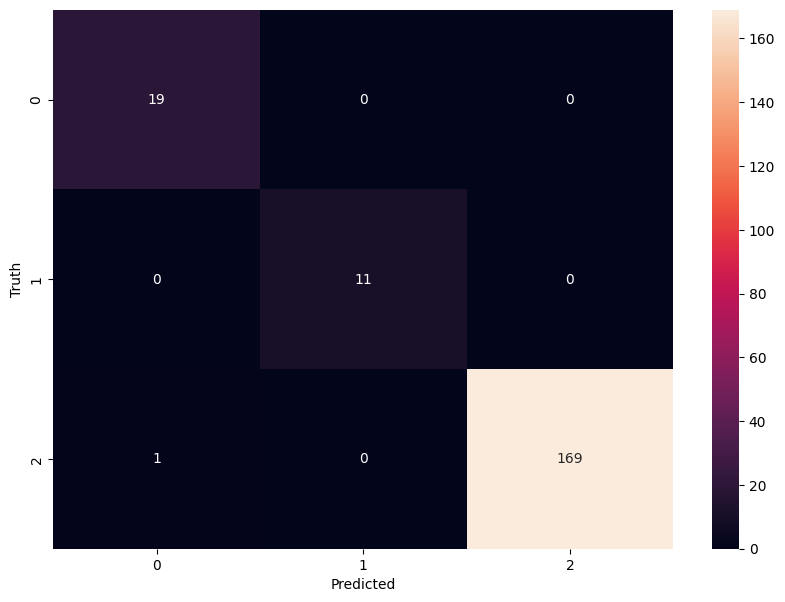

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()